In [10]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
file1 = r'D:/Programing/python_projects/machine_learning_algorithm/data_set/diamond_training_data.csv'
file2 = r'D:/Programing/python_projects/machine_learning_algorithm/data_set/diamond_validation_data.csv'
diamond_training_data = pd.read_csv(file1)
diamond_validation_data = pd.read_csv(file2)
numeric_diamond_training_data = diamond_training_data[[
    "carat", "depth", "table", "x", "y", "z"
]]
numeric_diamond_validation_data = diamond_validation_data[[
    "carat", "depth", "table", "x", "y", "z"
]]

In [12]:
numeric_diamond_training_data

,carat,depth,table,x,y,z
0,1.00,61.8,56.0,6.38,6.43,3.96
1,2.18,62.5,55.0,8.31,8.34,5.20
2,0.53,62.2,54.0,5.18,5.23,3.24
3,0.30,61.5,57.0,4.31,4.34,2.66
4,0.76,58.3,62.0,6.12,5.95,3.52
...,...,...,...,...,...,...
1495,2.35,62.3,58.0,8.51,8.44,5.28
1496,0.42,62.2,56.0,4.81,4.77,2.98
1497,1.16,61.8,55.0,6.75,6.78,4.18
1498,0.55,60.3,57.0,5.32,5.37,3.23


In [13]:
numeric_diamond_validation_data

,carat,depth,table,x,y,z
0,0.51,61.5,57.0,5.11,5.16,3.16
1,0.70,61.5,57.0,5.64,5.68,3.48
2,1.09,62.5,59.0,6.54,6.57,4.10
3,1.80,61.8,57.0,7.83,7.79,4.83
4,0.71,60.9,57.0,5.74,5.76,3.50
...,...,...,...,...,...,...
495,1.50,62.5,58.0,7.21,7.28,4.53
496,0.52,63.5,57.0,5.08,5.13,3.24
497,0.54,62.2,61.0,5.24,5.15,3.23
498,1.01,63.1,58.0,6.40,6.31,4.01


In [14]:
def get_training_and_validation_mae(degree):
    poly = PolynomialFeatures(degree=degree)
    polynomial_diamond_training_data = poly.fit_transform(
        numeric_diamond_training_data)
    polynomial_diamond_validation_data = poly.fit_transform(
        numeric_diamond_validation_data)

    diamond_model = LinearRegression()
    diamond_model.fit(polynomial_diamond_training_data,
                      diamond_training_data[["price"]])
    training_error = mean_absolute_error(
        diamond_model.predict(polynomial_diamond_training_data),
        diamond_training_data[["price"]])
    validation_error = mean_absolute_error(
        diamond_model.predict(polynomial_diamond_validation_data),
        diamond_validation_data[["price"]])
    return training_error, validation_error

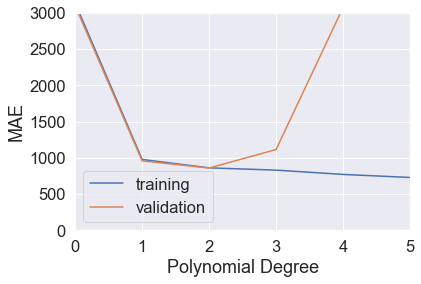

In [27]:
maes = np.array([get_training_and_validation_mae(i) for i in range(0, 6)
                ])  # sklearn==0.19版本才可以用0维
plt.plot(maes[:, 0])
plt.plot(maes[:, 1])
plt.axis([0, 5, 0, 3000])
plt.legend(["training", "validation"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MAE')
fig = plt.gcf()
fig.savefig("mae_vs_complexity_example.png", dpi=300, bbox_inches="tight")

In [16]:
def get_training_and_validation_mse(degree):
    poly = PolynomialFeatures(degree=degree)
    polynomial_diamond_training_data = poly.fit_transform(
        numeric_diamond_training_data)
    polynomial_diamond_validation_data = poly.fit_transform(
        numeric_diamond_validation_data)

    diamond_model = LinearRegression()
    diamond_model.fit(polynomial_diamond_training_data,
                      diamond_training_data[["price"]])
    training_error = mean_squared_error(
        diamond_model.predict(polynomial_diamond_training_data),
        diamond_training_data[["price"]])
    validation_error = mean_squared_error(
        diamond_model.predict(polynomial_diamond_validation_data),
        diamond_validation_data[["price"]])
    return training_error, validation_error

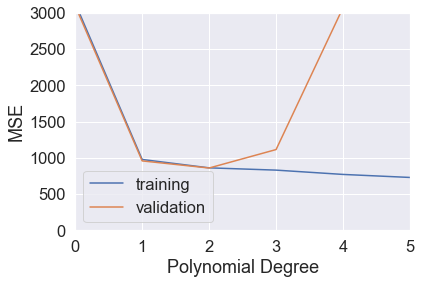

In [28]:
mses = np.array([get_training_and_validation_mae(i) for i in range(0, 6)])
plt.plot(maes[:, 0])
plt.plot(maes[:, 1])
plt.axis([0, 5, 0, 3000])
plt.legend(["training", "validation"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
fig = plt.gcf()
fig.savefig("mse_vs_complexity_example.png", dpi=300, bbox_inches="tight")

In [18]:
diamond_lm = LinearRegression(fit_intercept=False)
diamond_lm.fit(numeric_diamond_training_data, diamond_training_data['price'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [19]:
diamond_lm.coef_

array([10929.22839108,   102.63351882,   -68.58659808, -4337.56181477,
        5726.98390592, -4264.46705819])

In [20]:
diamond_lrm = linear_model.Ridge(alpha=1, fit_intercept=False)
diamond_lrm.fit(numeric_diamond_training_data, diamond_training_data['price'])

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
diamond_lrm.coef_

array([ 9982.92218626,    70.87249868,   -59.86772488, -2858.44145594,
        3873.86898817, -3032.30595988])

In [22]:
ss = StandardScaler()
ss.fit(numeric_diamond_training_data)
scaled_numeric_diamond_training_data = ss.transform(
    numeric_diamond_training_data)

In [23]:
scaled_numeric_diamond_training_data

array([[ 0.40699664,  0.08570641, -0.65913598,  0.55500569,  0.60192185,
         0.58918337],
       [ 2.90659436,  0.59760475, -1.12355608,  2.29996541,  2.33910941,
         2.40184537],
       [-0.58860583,  0.37821974, -1.58797619, -0.52994336, -0.48950489,
        -0.46333005],
       ...,
       [ 0.74592515,  0.08570641, -1.12355608,  0.88953164,  0.92025465,
         0.91078469],
       [-0.54623977, -1.01121861, -0.19471587, -0.40336597, -0.36217177,
        -0.47794829],
       [-0.50387371, -1.15747527, -0.65913598, -0.33103604, -0.31669566,
        -0.44871181]])

In [24]:
diamond_lrms = linear_model.Ridge(alpha=1, fit_intercept=False)
diamond_lrms.fit(scaled_numeric_diamond_training_data,
                 diamond_training_data['price'])

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
diamond_lrms.coef_

array([ 5037.85377372,   -18.43159469,  -157.06975023, -3309.51865518,
        3571.6046855 , -1552.60486515])

In [29]:
scale_ridge_model_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('model', linear_model.Ridge(alpha=1, fit_intercept=False))
])
scale_ridge_model_pipeline.fit(numeric_diamond_training_data,
                               diamond_training_data['price'])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [30]:
scale_ridge_model_pipeline.named_steps['model'].coef_

array([ 5037.85377372,   -18.43159469,  -157.06975023, -3309.51865518,
        3571.6046855 , -1552.60486515])

In [55]:
def get_diamond_ridge_training_and_validation_mae(alpha):
    scale_poly_fit_pipeline = Pipeline([
        ('scale', StandardScaler()), ('poly', PolynomialFeatures(4)),
        ('model', linear_model.Ridge(alpha=alpha, fit_intercept=False))
    ])
    scale_poly_fit_pipeline.fit(numeric_diamond_training_data,
                                diamond_training_data['price'])

    training_mae = mean_absolute_error(
        scale_poly_fit_pipeline.predict(numeric_diamond_training_data),
        diamond_training_data['price'])
    validation_mae = mean_absolute_error(
        scale_poly_fit_pipeline.predict(numeric_diamond_validation_data),
        diamond_validation_data['price'])
    return training_mae, validation_mae

In [56]:
def get_diamond_ridge_training_and_validation_mse(alpha):
    scale_poly_fit_pipeline = Pipeline([
        ('scale', StandardScaler()), ('poly', PolynomialFeatures(4)),
        ('model', linear_model.Ridge(alpha=alpha, fit_intercept=False))
    ])
    scale_poly_fit_pipeline.fit(numeric_diamond_training_data,
                                diamond_training_data['price'])

    training_mse = mean_squared_error(
        scale_poly_fit_pipeline.predict(numeric_diamond_training_data),
        diamond_training_data['price'])
    validation_mse = mean_squared_error(
        scale_poly_fit_pipeline.predict(numeric_diamond_validation_data),
        diamond_validation_data['price'])
    return training_mse, validation_mse

Text(0, 0.5, 'MAE')

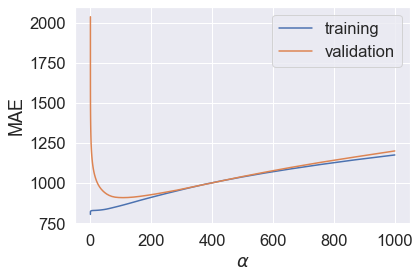

In [57]:
alphas = 10**np.linspace(3, -3, 100)
maes = np.array(
    [get_diamond_ridge_training_and_validation_mae(alpha) for alpha in alphas])
plt.plot(alphas, maes[:, 0])
plt.plot(alphas, maes[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

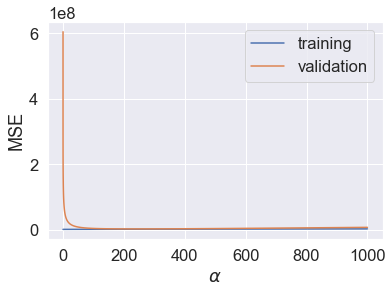

In [58]:
alphas = 10**np.linspace(3, -3, 100)
mses = np.array(
    [get_diamond_ridge_training_and_validation_mse(alpha) for alpha in alphas])
plt.plot(alphas, mses[:, 0])
plt.plot(alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')

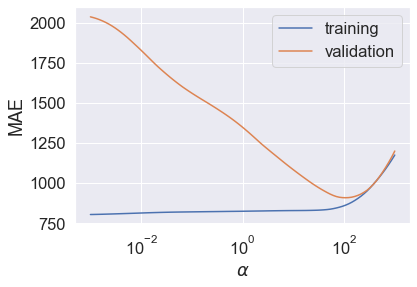

In [62]:
alphas = 10**np.linspace(-3, 3, 100)
maes = np.array(
    [get_diamond_ridge_training_and_validation_mae(alpha) for alpha in alphas])
plt.semilogx(alphas, maes[:, 0])
plt.semilogx(alphas, maes[:, 1])
plt.legend(['training', 'validation'])
plt.xlabel(r'$\alpha$')
plt.ylabel('MAE')
fig = plt.gcf()

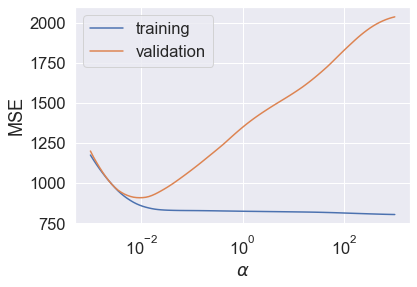

In [64]:
alphas = 10**np.linspace(3, -3, 100)
mses = np.array(
    [get_diamond_ridge_training_and_validation_mse(alpha) for alpha in alphas])
plt.semilogx(alphas, maes[:, 0])
plt.semilogx(alphas, maes[:, 1])
plt.legend(['training', 'validation'])
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
fig = plt.gcf()

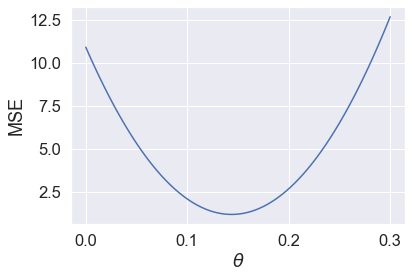

In [66]:
data = sns.load_dataset("tips")
thetas = np.linspace(0, 0.3, 100)
errors = [
    mean_squared_error(data['tip'], data['total_bill'] * theta)
    for theta in thetas
]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
fig = plt.gcf()
fig.savefig("MSE_vs_theta_alpha_zero.png", dpi=300, bbox_inches="tight")

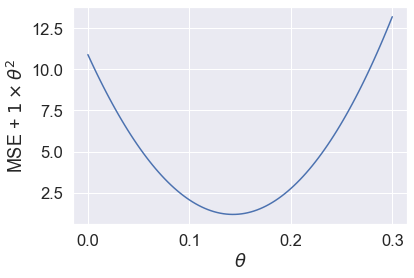

In [65]:
data = sns.load_dataset("tips")
thetas = np.linspace(0, 0.3, 100)
errors = [
    mean_squared_error(data['tip'], data['total_bill'] * theta + 1 * theta**2)
    for theta in thetas
]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel(r'MSE + $1 \times \theta^2$')
fig = plt.gcf()
fig.savefig("objective_vs_theta_alpha_1.png", dpi=300, bbox_inches="tight")

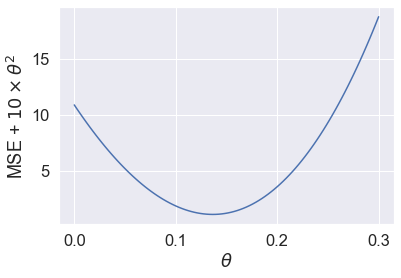

In [67]:
data = sns.load_dataset('tips')
thetas = np.linspace(0, 0.3, 100)
errors = [
    mean_squared_error(data['tip'], data['total_bill'] * theta + 10 * theta**2)
    for theta in thetas
]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel(r'MSE + $10 \times \theta^2$')
fig = plt.gcf()
fig.savefig('objective_vs_theta_alpha_10.png', dpi=300, bbox_inches='tight')

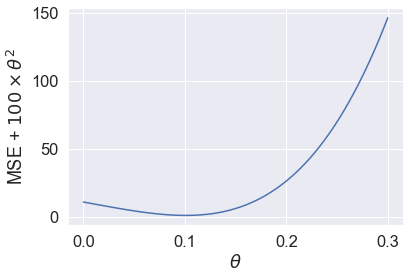

In [68]:
data = sns.load_dataset("tips")
thetas = np.linspace(0, 0.3, 100)
errors = [
    mean_squared_error(data['tip'], data['total_bill'] * theta + 100 * theta**2)
    for theta in thetas
]
plt.plot(thetas, errors)
plt.xlabel(r'$\theta$')
plt.ylabel(r'MSE + $100 \times \theta^2$')
fig = plt.gcf()
fig.savefig("objective_vs_theta_alpha_100.png", dpi=300, bbox_inches="tight")

In [70]:
scale_poly_ridge_pipeline = Pipeline([
    ('scale', StandardScaler()), ('poly', PolynomialFeatures(4)),
    ('model', linear_model.Ridge(alpha=100, fit_intercept=False))
])
scale_poly_ridge_pipeline.fit(numeric_diamond_training_data,
                              diamond_training_data['price'])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', Ridge(alpha=100, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [71]:
scale_poly_lasso_pipeline = Pipeline([
    ('scale', StandardScaler()), ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Lasso(alpha=100, fit_intercept=False))
])

scale_poly_lasso_pipeline.fit(numeric_diamond_training_data,
                              diamond_training_data[["price"]])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', Lasso(alpha=100, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [73]:
scale_poly_ridge_pipeline.named_steps['model'].coef_

array([ 2.27153953e+03,  3.98227815e+02, -6.82758865e+00, -3.74460584e+01,
        7.91823339e+02,  8.66815062e+02,  8.19389264e+02,  3.79109981e+01,
       -2.50456554e+01,  2.95370877e+01,  1.02432495e+02,  1.45952707e+02,
        1.21922865e+02,  1.39460338e+02,  1.61544769e+02, -4.38658218e+01,
       -2.63082781e+01,  5.63552218e+00,  1.71768145e+02,  1.71773244e+01,
       -9.38674578e+00,  1.18860959e+01,  2.40646162e+02,  2.89532706e+02,
        2.57557983e+02,  3.43896566e+02,  3.10683332e+02,  2.89494712e+02,
       -6.86183491e+01, -2.76113679e+01,  5.82712255e+00, -6.29703583e+01,
       -2.47881613e+01, -4.01775423e+01,  2.96981753e-01, -6.45176449e+01,
       -1.16608586e+00, -2.82377840e+01, -1.07396965e+00, -1.51492873e+01,
        2.00215331e+00, -1.27307466e+01, -1.71120457e+01, -5.52992933e+01,
       -8.86835693e+00, -2.61214709e+01,  3.95514229e+01,  1.61413957e+01,
        3.48818079e+00, -1.20217730e+01,  3.46523794e+01, -4.10584645e+01,
        6.94721087e+01, -

In [74]:
scale_poly_lasso_pipeline.named_steps['model'].coef_

array([ 2.79150404e+03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.79824468e+03,  1.21366790e+03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.06744330e+02,  2.65432190e+02,  1.44230754e+02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.83493429e+01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -